# 06PopulationCOVID19

# Libraries

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Loading Data

In [10]:
population = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\population.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [11]:
population.shape

(243, 12)

# Data Types

In [12]:
population.dtypes

code                          int64
province                     object
city                         object
latitude                    float64
longitude                   float64
elementary_school_count       int64
kindergarten_count            int64
university_count              int64
academy_ratio               float64
elderly_population_ratio    float64
elderly_alone_ratio         float64
nursing_home_count            int64
dtype: object

# Missing Data

In [13]:
population.isna().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [14]:
population.isna().sum()

code                        0
province                    0
city                        0
latitude                    0
longitude                   0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

# Delete Unneeded Columns

In [15]:
population = population.drop(
    [
        "code",
        "city",
        "latitude",
        "longitude",
        "academy_ratio",
        "elderly_population_ratio",
        "elderly_alone_ratio",
    ],
    axis=1,
)

# Rename Columns

In [16]:
population.rename(
    columns={
        "province": "Province",
        "elementary_school_count": "Elem Schools",
        "kindergarten_count": "Kindergartens",
        "university_count": "Universities",
        "nursing_home_count": "Nursing Homes"
        
    },
    inplace=True,
)

# Reorder Columns

In [17]:
population = population[
    [
        "Province",
        "Kindergartens",
        "Elem Schools",
        "Universities",
        "Nursing Homes",
    ]
]

# The First Five Rows

In [18]:
population.head()

,Province,Kindergartens,Elem Schools,Universities,Nursing Homes
0,Seoul,830,607,48,22739
1,Seoul,38,33,0,3088
2,Seoul,32,27,0,1023
3,Seoul,21,14,0,628
4,Seoul,56,36,1,1080


# Nursing Homes

In [19]:
nursing_homes = population.groupby(['Province'])['Nursing Homes'].sum().sort_values(ascending = False)

In [20]:
pd.set_option("display.max.columns", None)
pivot_nursing_homes = pd.pivot_table(
    data=population,
    index="Province",
    values=["Nursing Homes"],
    aggfunc="sum",
)

pivot_nursing_homes = pivot_nursing_homes.loc[pivot_nursing_homes['Nursing Homes'] > 10000].sort_values('Nursing Homes',ascending = False)
pivot_nursing_homes.reset_index(inplace=True)

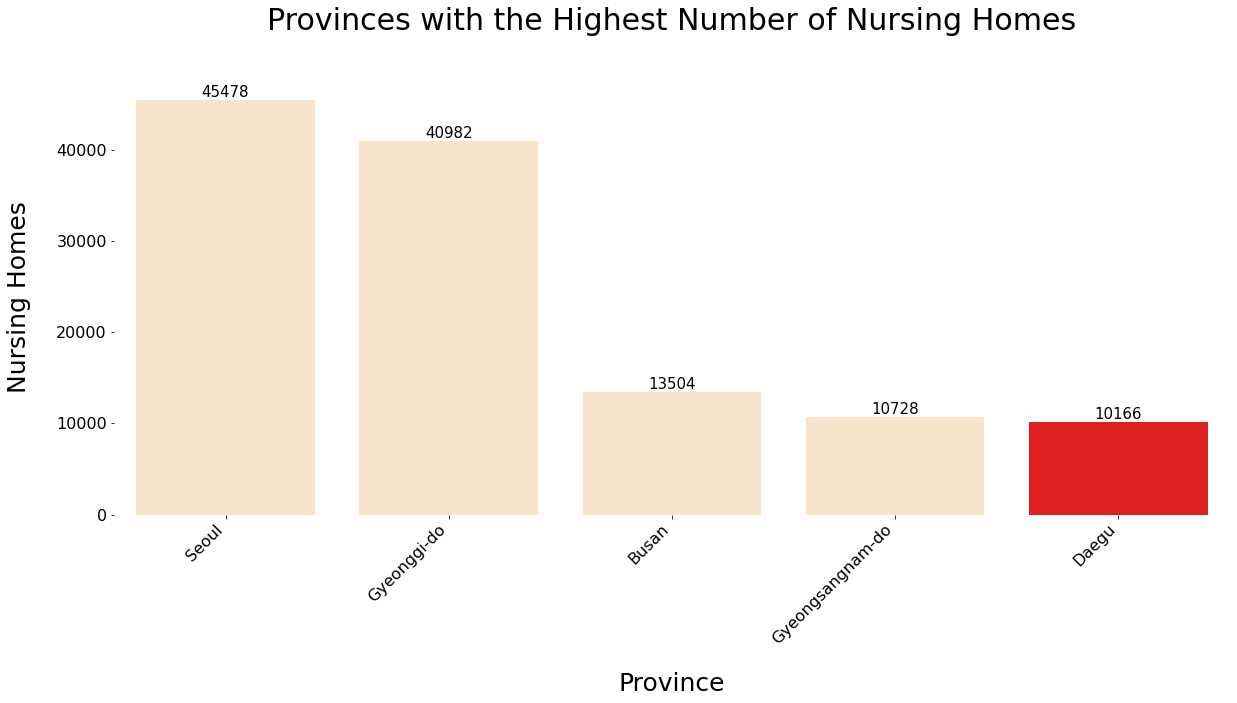

In [22]:
ord_color = "bisque"
spec_color = "red"

palette = {
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
    "Busan": ord_color,
    "Gyeongsangnam-do": ord_color,
    "Daegu": spec_color,
}


plt.figure(figsize=(20, 8))
chart = sns.barplot(
    x="Province",
    y="Nursing Homes",
    data=pivot_nursing_homes,
    ci=None,
    order=pivot_nursing_homes.sort_values("Nursing Homes", ascending=False).Province,
    palette=palette,
)

sns.despine(left=True, bottom=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Nursing Homes", fontsize=25, labelpad=25)

chart.bar_label(chart.containers[0], size=15)
plt.title("Provinces with the Highest Number of Nursing Homes", fontsize=30, y=1.1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right");

# Academic Institutions

In [24]:
academic = population.groupby(['Province'])[['Kindergartens', 'Elem Schools', 'Universities']].agg(sum)
academic = academic.reset_index()
academic
academic ['Total'] = academic.sum(axis=1)
academic = academic.sort_values('Total',ascending = False)
academic = academic.loc[academic['Total'] > 1000].sort_values('Total',ascending = False)

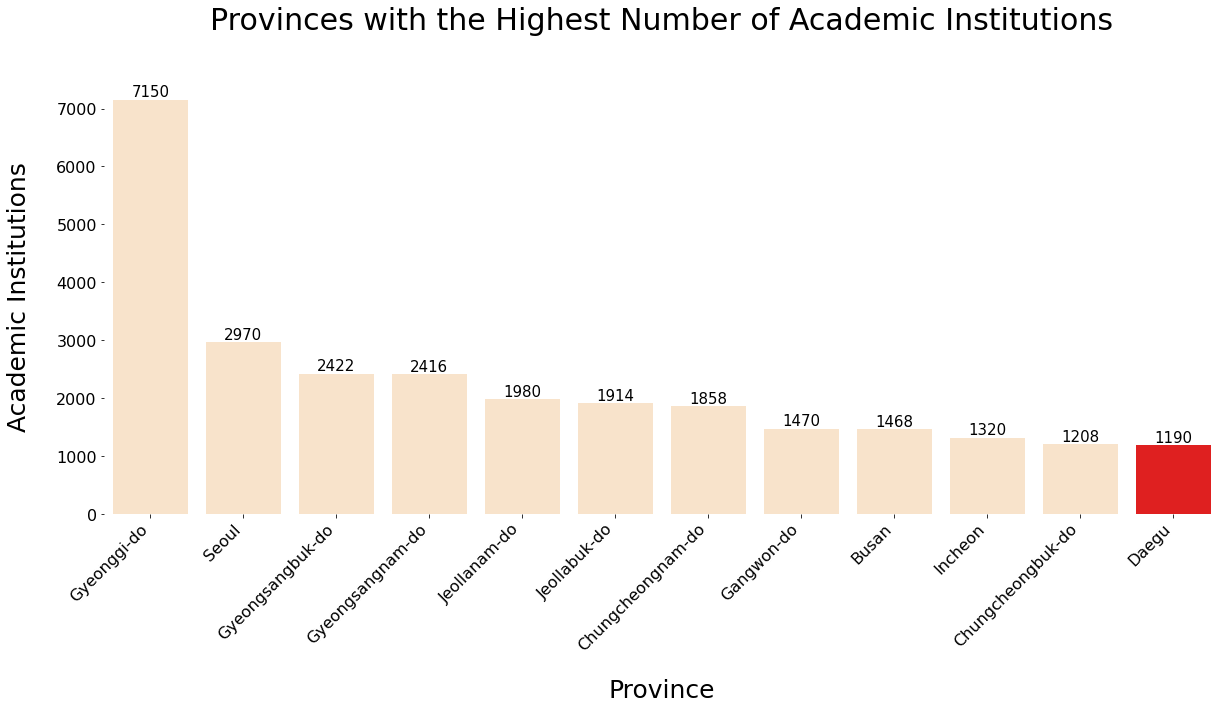

In [25]:
ord_color = "bisque"
spec_color = "red"

palette = {
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
    "Busan": ord_color,
    "Gyeongsangbuk-do": ord_color,
    "Gyeongsangnam-do": ord_color,
    "Jeollanam-do": ord_color,
    "Jeollabuk-do": ord_color,
    "Chungcheongnam-do": ord_color,
    "Gangwon-do": ord_color,
    "Incheon": ord_color,
    "Chungcheongbuk-do": ord_color,
    "Daegu": spec_color,
}


plt.figure(figsize=(20, 8))
chart = sns.barplot(
    x="Province",
    y="Total",
    data=academic,
    ci=None,
    order=academic.sort_values("Total", ascending=False).Province,
    palette=palette,
)

sns.despine(left=True, bottom=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Province", fontsize=25, labelpad=25)
plt.ylabel("Academic Institutions", fontsize=25, labelpad=25)

chart.bar_label(chart.containers[0], size=15)
plt.title("Provinces with the Highest Number of Academic Institutions", fontsize=30, y=1.1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right");